In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=500, n_features=4,
                    n_classes=3, n_clusters_per_class=1,
                    random_state=42)
stimuli = {'x': x, 'y': y}

In [220]:
%reload_ext autoreload
%autoreload 2


from src.nuclei.nucleus import LongNucleus1B, LongNucleus
from src.nuclei.activations import Sigmoid, Binary, Relu
from src.nuclei.losses import CrossEntropy, MAE
from src.nuclei.anneal import LongAnneal

In [221]:
n = LongNucleus(input_size=4, output_size=2, activation=Relu(), lr=0.005)
anneal = LongAnneal(n, temp=2, loss_func=MAE(), steps=500, epochs=5)

Epoch: 1


training in epoch 1: 100%|██████████| 500/500 [00:02<00:00, 193.22it/s]


Epoch 1 validation error: 0.3370288248337029
Epoch training loss: 0.2899999999999999
Epoch: 2


training in epoch 2: 100%|██████████| 500/500 [00:02<00:00, 183.99it/s]


Epoch 2 validation error: 0.3370288248337029
Epoch training loss: 0.2899999999999999
Epoch: 3


training in epoch 3: 100%|██████████| 500/500 [00:02<00:00, 199.16it/s]


Epoch 3 validation error: 0.3370288248337029
Epoch training loss: 0.2899999999999999
Epoch: 4


training in epoch 4: 100%|██████████| 500/500 [00:02<00:00, 213.83it/s]


Epoch 4 validation error: 0.3370288248337029
Epoch training loss: 0.2899999999999999
Epoch: 5


training in epoch 5: 100%|██████████| 500/500 [00:02<00:00, 227.69it/s]

Epoch 5 validation error: 0.3370288248337029
Epoch training loss: 0.2899999999999999


<Axes: >

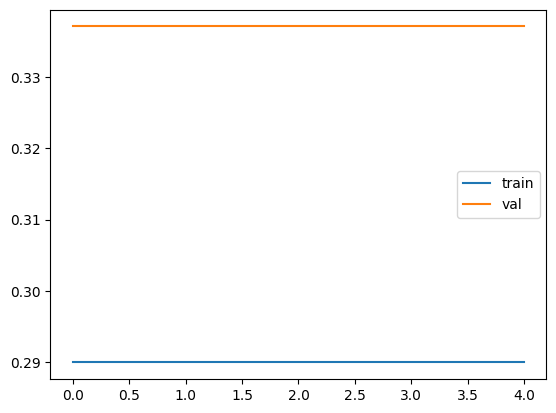

In [222]:
import pandas as pd

best, loss, val = anneal.stimulate(stimuli, validate=True, train_size=0.1)
pd.DataFrame(val).plot()

In [216]:
def predict(model, stimulus):
    pred = [str(int(v)) for v in model.project(stimulus)]
    pred = ''.join(pred)
    return int(pred, 2)

for i in range(30):
    print(predict(best, x[i]), y[i])

0 1
0 1
0 1
0 2
0 2
0 1
0 1
0 1
0 0


ValueError: invalid literal for int() with base 2: '1820'